In [82]:
from __future__ import print_function

In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import csv
import os
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jingwang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def file_reader(file_path, num_rows=None, chunksize=None):
    if chunksize is None:
        return pd.read_csv(file_path, encoding='gbk', nrows=num_rows, chunksize=chunksize)
    else:
        chunks = pd.read_csv(file_path, encoding='gbk', nrows=num_rows, chunksize=chunksize)
        return pd.concat(chunks)

In [3]:
def get_absolute_file_path(folder_name, file_name):
    return os.path.join(os.path.dirname(os.getcwd()), folder_name, file_name)

In [5]:
# set up all file path
user_file_path = get_absolute_file_path('data', 'JData_User.csv')
product_file_path = get_absolute_file_path('data', 'JData_Product.csv')
comment_file_path = get_absolute_file_path('data', 'JData_Comment(修正版).csv')
action_02_file_path = get_absolute_file_path('data', 'JData_Action_201602.csv')
action_03_extra_file_path = get_absolute_file_path('data', 'JData_Action_201603_extra.csv')
action_03_file_path = get_absolute_file_path('data', 'JData_Action_201603.csv')
action_04_file_path = get_absolute_file_path('data', 'JData_Action_201604.csv')

In [103]:
# read files

product_file = file_reader(product_file_path, 10)
comment_file = file_reader(comment_file_path, 10)
action_02_file = file_reader(action_02_file_path, 10)
action_03_extra_file = file_reader(action_03_extra_file_path, 10)
action_03_file = file_reader(action_03_file_path, 10)
action_04_file = file_reader(action_04_file_path, 10)

# Basic Statistical Description

## User Profile Detection

In [6]:
# user file
user_file = file_reader(user_file_path)
user_file.head()

,user_id,age,sex,user_lv_cd,user_reg_dt
0,54,-1,2,1,2016/1/26
1,79,36-45岁,2,2,2016/1/27
2,100,16-25岁,2,3,2016/1/27
3,266,15岁以下,2,2,2016/1/29
4,333,-1,2,4,2016/1/30


In [7]:
print('User File Length:', len(user_file))
print('Unique User ID:', len(pd.unique(user_file['user_id'])))

('User File Length:', 103616)
('Unique User ID:', 103616)


User file stores all unique user data, totally 103616

In [8]:
# age distribution
def age_distribution(filename):
    age_cate = pd.unique(filename['age'])
    age_to_code = {}
    code_to_age = {}
    for code, age in enumerate(age_cate):
        if '-1' in age:
            age_to_code[age] = 0
            code_to_age[0] = age
        if '15' in age:
            age_to_code[age] = 1
            code_to_age[1] = age
        if '16' in age:
            age_to_code[age] = 2
            code_to_age[2] = age
        if '26' in age:
            age_to_code[age] = 3
            code_to_age[3] = age
        if '36' in age:
            age_to_code[age] = 4
            code_to_age[4] = age
        if '46' in age:
            age_to_code[age] = 5
            code_to_age[5] = age
        if '56' in age:
            age_to_code[age] = 6
            code_to_age[6] = age
            
    # count age
    age_count = pd.DataFrame(pd.Series.value_counts(filename['age']))
    age_count = age_count.reset_index()
    age_count.columns = ['cate', 'count']
    age_count['code'] = age_count['cate'].apply(lambda x: age_to_code[x])
    age_count

    # plot
    sns.barplot(age_count['code'], age_count['count'])

    return age_count

<IPython.core.display.Javascript object>


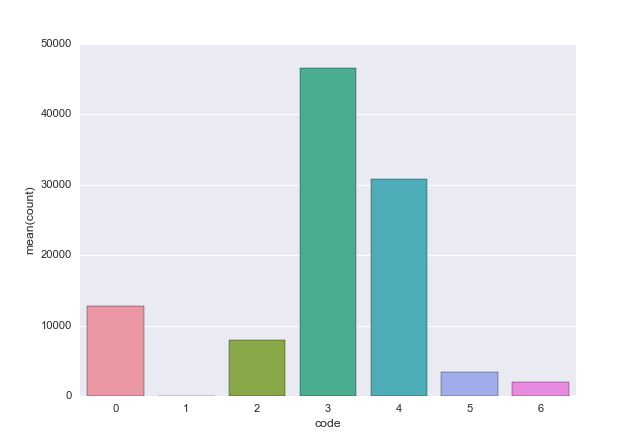

,cate,count,code
0,26-35岁,46525,3
1,36-45岁,30828,4
2,-1,12803,0
3,16-25岁,7999,2
4,46-55岁,3407,5
5,56岁以上,2048,6
6,15岁以下,6,1


In [9]:
age_count = age_distribution(user_file)
age_count

0: unknown, 1: below 15, 2: 16-25, 3: 26-35, 4: 36-45, 5: 46-55, 6: above 56  
From the figure above, most of people are 25-45. Quite a number of people don't show ages. The distribution is not like Gaussian,  
but almost there

In [10]:
# sex 
def sex_distribution(filename):
    print pd.Series.value_counts(filename['sex'])
sex_distribution(user_file)

2    50484
0    45547
1     7585
Name: sex, dtype: int64


In [11]:
# user_lv_cd 用户等级
def user_cd_distribution(filename):
    print pd.Series.value_counts(filename['user_lv_cd'])
user_cd_distribution(user_file)

5    39875
4    32205
3    21689
2     7519
1     2328
Name: user_lv_cd, dtype: int64


<IPython.core.display.Javascript object>


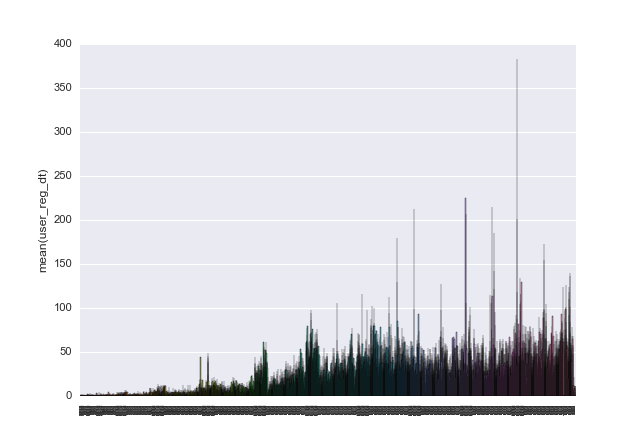

(array([   0,    1,    2, ..., 3509, 3510, 3511]),
 <a list of 3512 Text xticklabel objects>)

In [12]:
# register date
df = pd.DataFrame(pd.Series.value_counts(user_file['user_reg_dt']))
df.sort_index(inplace = True)
sns.barplot(df.index, df['user_reg_dt'])
plt.xticks(rotation = 90, fontsize = 2)

Most of users have registered in recent years. 

## Product Information

In [32]:
product_file.head()

,sku_id,attr1,attr2,attr3,cate,brand
0,166731,1,-1,-1,8,545
1,146488,2,2,-1,8,812
2,70546,3,1,1,8,214
3,92487,2,2,-1,8,812
4,113065,2,2,-1,8,812


In [33]:
comment_file.head()

,dt,sku_id,comment_num,has_bad_comment,bad_comment_rate
0,2016-02-01,83714,4,1,0.0393
1,2016-02-01,125225,3,1,0.0833
2,2016-02-01,76379,4,1,0.0328
3,2016-02-01,150212,1,0,0.0000
4,2016-02-01,123004,2,0,0.0000


In [34]:
action_04_file.head()

,user_id,sku_id,time,model_id,type,cate,brand
0,100259,159398,2016-04-01 19:33:47,NaN,6,4,752
1,100259,159398,2016-04-01 19:33:55,NaN,6,4,752
2,100259,159398,2016-04-01 19:28:37,NaN,6,4,752
3,100259,159398,2016-04-01 19:33:18,NaN,6,4,752
4,56097,32453,2016-04-01 06:57:37,NaN,6,9,640


## Cluster product

In [84]:
product_file_path = get_absolute_file_path('data', 'JData_Product.csv')
product_file = file_reader(product_file_path, None)

In [85]:
product_file.hist(alpha=0.5)

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1232a1dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124b77390>]], dtype=object)

## Sample dataset

In [14]:
def generate_small_training_set(frac=0.1, random_state=100):
    user_file_path = get_absolute_file_path('data', 'JData_User.csv')
    user_file = file_reader(user_file_path, None)
    sampled_user_info = user_file.sample(frac=frac, random_state=random_state)
    sampled_user = sampled_user_info['user_id']
    
    # see sample information
    age_distribution(sampled_user_info)
    sex_distribution(sampled_user_info)
    user_cd_distribution(sampled_user_info)
    
    action_file_name_list = [
        'JData_Action_201602.csv', 
        'JData_Action_201603_extra.csv', 
        'JData_Action_201603.csv', 
        'JData_Action_201604.csv']
    
    filtered_action_file = list()
    for action_file_name in action_file_name_list:
        print('loading {}'.format(action_file_name))
        action_file_path = get_absolute_file_path('data', action_file_name)
        action_file = file_reader(action_file_path, None)
        filtered_action_file.append(action_file.loc[action_file['user_id'].isin(sampled_user)])
        
    return pd.concat(filtered_action_file, ignore_index=True)

<IPython.core.display.Javascript object>


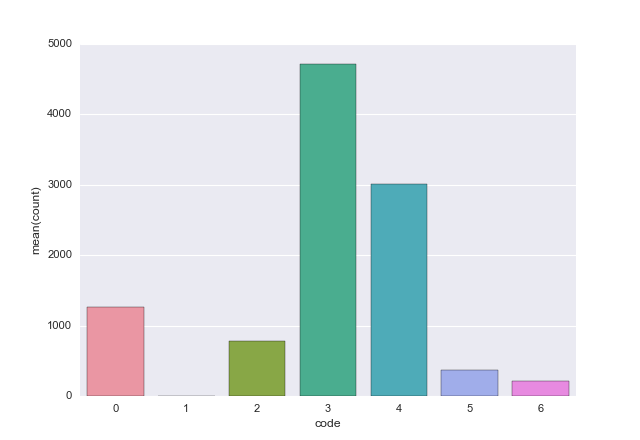

2    5068
0    4551
1     743
Name: sex, dtype: int64
5    3969
4    3169
3    2266
2     744
1     214
Name: user_lv_cd, dtype: int64
loading JData_Action_201602.csv
loading JData_Action_201603_extra.csv
loading JData_Action_201603.csv
loading JData_Action_201604.csv


,user_id,sku_id,time,model_id,type,cate,brand
0,88047,12037,2016-02-01 15:16:36,NaN,6,4,752
1,88047,12037,2016-02-01 15:16:37,NaN,6,4,752
2,85421,106487,2016-02-01 06:27:35,NaN,6,4,800
3,85421,106487,2016-02-01 06:30:47,NaN,6,4,800
4,85421,106487,2016-02-01 06:27:21,NaN,6,4,800


In [16]:
sampled_training_set = generate_small_training_set(frac=0.10)

In [2]:
# save sample data
sampled_training_set.head()
sampled_training_set.to_csv('sample_data.csv', index = False)

In [4]:
# read sample dataset
sample = pd.read_csv('sample_data.csv')

In [5]:
users = pd.unique(sample['user_id'])
skus = pd.unique(sample['sku_id'])
print 'Number of Users:', len(users)
print 'Number of Products:', len(skus)

Number of Users: 10354
Number of Products: 19103


In [6]:
# build four dictionary
user_to_code = {u:c for c, u in enumerate(users)}
code_to_user = {c:u for c, u in enumerate(users)}
skus_to_code = {s:c for c, s in enumerate(skus)}
code_to_skus = {c:s for c, s in enumerate(skus)}

# initialize utility matrix
# utility_matrix = np.zeros((len(users), len(skus)))

# rating criterion based on action type
# could be changed
# Action评分标准
# 浏览 1, 点击 2, 关注 3, 加入购物车 4, 下单 5, 从购物车删除 -3 (说明之前感兴趣，又不买了，但是确实浏览过)
# 时间关系: 最近下单的商品在之后5天再次购买几率会很小，而最近加入购物车的商品之后购买概率最高，点击，浏览关注的购买几率上升
# idea: 分为几个时间段，进行penalize或者给权重 （结果是之后5天购买的可能性，所以可以选5天为一个时间区间）

# to be discussed
type_to_rating = {1: 1, 2: 4, 3: -3, 4: 5, 5: 3, 6: 2}

# action type rating
sample['rating'] = sample['type'].apply(lambda x: type_to_rating[x])

In [147]:
# extract date information and eliminate the specific time
sample['date'] = sample['time'].apply(lambda x: x.split(" ")[0])

In [22]:
date_unique = pd.unique(sample['date'])
total_day = len(date_unique)
num_interval = total_day / 5.

# key is the range of date, value is the weights of different action
time_weight = {}
time_to_code = {}

idx = 0
pointer = 1

# 权重的值应该基于用户历史记录而定, 待定
while idx < total_day:
    key = date_unique[idx:idx+5]
    time_to_code[tuple(key)] = pointer
    value = {1: float(pointer)/total_day, 2: float(pointer+4)/total_day, \
             3: -float(pointer)/total_day, 4: 1-float(pointer)/total_day, 5: float(pointer+2)/total_day, 6: float(pointer+1)/total_day}
    
    time_weight[pointer] = value
    idx += 5
    pointer += 1

In [148]:
def calculate_date_index(group):
    for key in time_to_code:
        if group in key:
            return time_to_code[key]
sample['date_index'] = sample['date'].apply(lambda x: calculate_date_index(x))

In [51]:
t_weight = []
for t, d in zip(sample['type'], sample['date_index']):
    t_weight.append(time_weight[d][t])
sample['time_weight'] = t_weight

In [150]:
# first trial based on type and time_weight

# split train & test
last_five = 15
test = sample[sample['date_index'] == last_five]
test = test[test['type'] == 4]
train = sample.loc[~sample.index.isin(test.index)]
train = train[train['user_id'].isin(test['user_id'])]

In [151]:
test_data = test[['user_id', 'sku_id']].groupby(['user_id']).agg(lambda x: set(x))
test_data.head()

,sku_id
user_id,
910,{75588}
941,{161883}
1128,{74499}
1304,{107012}
1500,{54357}


In [153]:
train['score'] = train['rating']*train['time_weight']
train.head()

,user_id,sku_id,time,model_id,type,cate,brand,rating,date,date_index,time_weight,score
120,50658,44042,2016-02-01 20:40:30,NaN,6,4,885,2,2016-02-01,1,0.026667,0.053333
123,50658,44042,2016-02-01 20:40:13,NaN,6,4,885,2,2016-02-01,1,0.026667,0.053333
124,50658,44042,2016-02-01 20:39:46,NaN,6,4,885,2,2016-02-01,1,0.026667,0.053333
125,50658,44042,2016-02-01 20:40:13,NaN,6,4,885,2,2016-02-01,1,0.026667,0.053333
128,50658,44042,2016-02-01 20:39:30,NaN,6,4,885,2,2016-02-01,1,0.026667,0.053333


In [187]:
# consider frequency
freq = train[['user_id', 'sku_id', 'score']].groupby(['user_id', 'sku_id']).agg(['count'])
freq = freq['score']['count'] / total_day
freq[910][22962]
freq[910][75588]

2.7066666666666666

In [202]:
result = train[['user_id', 'sku_id', 'score']].groupby(['user_id', 'sku_id']).agg(lambda x: max(x))
result = result.reset_index()
unique_users = pd.unique(result['user_id'])
buy_list = {}
for user in unique_users:
    user_data = result[result['user_id'] == user]
    dic = {}
    for sku, score in zip(user_data['sku_id'], user_data['score']):
#         if sku == 75588 and user == 910: print score
#         if sku == 22962 and user == 910: print score
        dic[sku] = freq[user][sku]
    
    import operator
    sorted_dic = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
    buy_list[user] = sorted_dic[0][0] # 先都取第一个

In [203]:
train_result = pd.DataFrame([buy_list]).transpose()
train_result.columns = ['sku_id']
train_result.head()

,sku_id
910,75588
941,80030
1128,64159
1304,109726
1500,162573


In [204]:
# accuracy
correct = 0
for idx in train_result.index:
    pred_sku = train_result.loc[idx][0]
    true_sku = test_data.loc[idx][0]
    if pred_sku in true_sku:
        correct += 1
print 'accuracy:', correct / float(len(train_result))

accuracy: 0.530785562633


In [34]:
# build utility dictionary not matrix for users themself
utility = {user: {} for user in range(len(user_to_code))}
for u, s, r in zip(sample['user_id'], sample['sku_id'], sample['rating']):
    user_code = user_to_code[u]
    sku_code = skus_to_code[s]
    
    if sku_code not in utility[user_code]:
        utility[user_code][sku_code] = r
    else:
        utility[user_code][sku_code] += r

In [ ]:
utility[0]

## Number of products sold by time

<IPython.core.display.Javascript object>


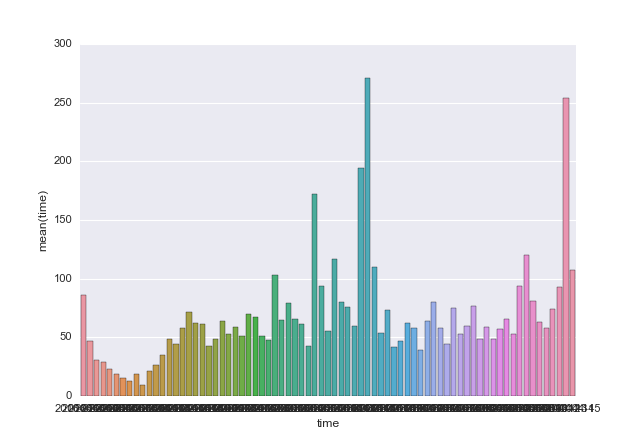

In [89]:
sold_product = sampled_training_set.loc[sampled_training_set['type']==4]
sales_by_time = sold_product.groupby(pd.to_datetime(sold_product['time']).dt.date).count()
sns.barplot(sales_by_time.index, sales_by_time.time)


## Baseline
First start with a simple rule_based model use a user's most recent actions frequency to predict its next purchase action 

In [83]:
def generate_training_data(action_file):
    grouped_action = pd.DataFrame(action_file.groupby(['user_id', 'sku_id', 'type']).size().rename('counts'))
    grouped_action = grouped_action.reset_index()
    return grouped_action

In [77]:
action_04 = file_reader(action_04_file_path, None, 1000)

In [85]:
training_samples = generate_training_data(action_04)
training_samples.head()

,user_id,sku_id,type,counts
0,1,124997,1,10
1,1,124997,6,11
2,2,4919,1,2
3,2,4919,6,3
4,2,7746,1,6


In [ ]:
def rule(candidates):
    

def rule_based_prediction(training_samples):
    pred = dict()
    for user_id in training_samples:
        sku_id = rule(training_samples[user_id])
        pred[user_id] = sku_id
        
    return pred

## Machine Learning

In [ ]:
class model(object):
    def __init__(self):
        
    def train(self):
        
    def test(self):
        
      